# 과제3. 직원 이직 분석

* 여러분은 OO회사의 **데이터분석가** 입니다.
* **인사팀**에서는 여러분에게 우리 회사 직원의 **이직(Attrition)에 영향을 주는 요인**을 분석해달라고 요청해 왔습니다.

![](https://adoptostaging.blob.core.windows.net/media/employee-attrition-reasons-9LIqMv.jpg)

## 0.환경설정

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm

### 2) 데이터 로딩

In [2]:
# data data
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_NA.CSV"
data = pd.read_csv(path)
data.drop(['EducationField', 'Education','JobInvolvement', 'StockOptionLevel', 'BusinessTravel','YearsWithCurrManager'
,'YearsInCurrentRole','JobRole', 'Department','EmployeeNumber','EnvironmentSatisfaction','TrainingTimesLastYear','YearsAtCompany']
          , axis = 1, inplace = True)
data['Attrition'] = np.where(data['Attrition']=='Yes', 1, 0)
data.head(10)

,Attrition,Age,DistanceFromHome,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance
0,0,33,7.0,Male,3,Married,11691,0.0,No,11,4,14,4
1,0,35,18.0,Male,4,Single,9362,2.0,No,11,3,10,3
2,0,42,6.0,Male,1,Married,13348,9.0,No,13,2,18,4
3,0,46,2.0,Female,1,Married,17048,8.0,No,23,1,28,3
4,0,39,NaN,Male,4,Divorced,4127,2.0,No,18,4,7,3
5,1,22,4.0,Male,3,Single,3894,5.0,No,16,3,4,3
6,0,24,21.0,Male,1,Divorced,2296,0.0,No,14,2,2,3
7,0,34,8.0,Male,3,Married,4404,2.0,No,12,1,6,4
8,0,30,20.0,Male,1,Married,9957,0.0,No,15,3,7,2
9,0,26,6.0,Female,4,Married,2659,1.0,Yes,13,3,3,3


|	구분	|	변수 명	|	내용	|	type	|	비고	|
|	----	|	----	|	----	|	----	|	----	|
|	**Target**	|	**Attrition**	|	이직여부, Yes , No	|	범주	| 1- 이직, 0- 잔류		|
|	feature	|	Age	|	나이	|	숫자	|		|
|	feature	|	DistanceFromHome	|	집-직장 거리	|	숫자	|	마일	|
|	feature	|	Gender	|	성별	|	범주	| Male, Female		|
|	feature	|	JobSatisfaction	|	직무 만족도	|	범주	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	feature	|	MaritalStatus	|	결혼상태	|	범주	| Single, Married, Divorced		|
|	feature	|	MonthlyIncome	|	월급	|	숫자	| 달러	|
|	feature	|	NumCompaniesWorked	|	입사 전 근무한 회사 수	|	숫자	|	0 - 우리회사가 첫 직장	|
|	feature	|	RelationshipSatisfaction	|	동료와의 관계	|	범주	| 1 Low, 2 Medium, 3 High, 4 Very High		|
|	feature	|	OverTime	|	야근여부	|	범주	|	Yes, No	|
|	feature	|	PercentSalaryHike	|	전년대비 급여인상율	|	숫자	|	%	|
|	feature	|	TotalWorkingYears	|	총 경력 연수	|	숫자	|		|
|	feature	|	WorkLifeBalance	|	워라밸. 일-삶 균형도	|	범주	|	1 Bad, 2 Good, 3 Better, 4 Best	|

* 분석 단위 : 직원 한사람, 한사람...
* 설명에서 언급되어지지 않은 사항은 직접 고민하며 스스로 정해서 진행하시면 됩니다.^^
* 자\~! 이제 시작해 봅시다\~!

In [9]:
print(data.loc[data.Attrition==1,:].mean())
print(data.loc[data.Attrition==0,:].mean())
print(data.Attrition.mean())
data.loc[data.Attrition==1,:]

Attrition                      1.000000
Age                           33.375000
DistanceFromHome              10.774359
JobSatisfaction                2.515000
MonthlyIncome               4738.125000
NumCompaniesWorked             2.984925
PercentSalaryHike             15.265000
RelationshipSatisfaction       2.585000
TotalWorkingYears              8.035000
WorkLifeBalance                2.700000
dtype: float64
Attrition                      0.000000
Age                           37.608571
DistanceFromHome               8.963037
JobSatisfaction                2.770476
MonthlyIncome               6866.009524
NumCompaniesWorked             2.619417
PercentSalaryHike             15.206667
RelationshipSatisfaction       2.742857
TotalWorkingYears             11.968571
WorkLifeBalance                2.773333
dtype: float64
0.16


,Attrition,Age,DistanceFromHome,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance
5,1,22,4.0,Male,3,Single,3894,5.0,No,16,3,4,3
10,1,24,3.0,Female,3,Single,4577,9.0,No,14,1,4,3
12,1,33,15.0,Male,3,Married,13610,7.0,Yes,12,4,15,4
18,1,58,2.0,Male,4,Divorced,2380,9.0,Yes,14,4,3,2
22,1,32,7.0,Male,3,Married,4883,1.0,No,18,1,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,1,34,23.0,Female,1,Divorced,9950,9.0,Yes,15,3,11,3
1216,1,19,NaN,Female,2,Single,1859,1.0,Yes,25,2,1,4
1227,1,22,3.0,Male,4,Married,2853,0.0,Yes,11,2,1,3
1230,1,19,21.0,Male,2,Single,2121,1.0,Yes,13,2,1,4


----

## 1.가설수립

* 여기서는 가설을 간략히 수립합니다.
    * 숫자형, 범주형 각각 최소 3개 이상씩, 전체 6개 이상의 변수를 도출, 가설을 수립하시오.

* 가설1 : 남자는 워라밸, 여자는 동료와의 관계가 이직률에 더 높은 영향을 끼칠 것이다.

* 가설2 : 평균근무 년차가 작을수록 이직률이 높을 것이다.

* 가설3 : 전년 대비 상승금액이 클수록 이직률이 낮을 것이다.

* 가설4 : 결혼여부는 이직률에 큰 영향을 끼칠 것이다.

* 가설5 : 나이대가 어릴수록 이직률이 높을 것이다.

* 가설6 : 거리가 멀수록 이직률이 높아짐.

----

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ NaN 존재 여부 및 조치 방안  

④ 기초통계량  

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

In [3]:
data.isna().sum()

Attrition                    0
Age                          0
DistanceFromHome            54
Gender                       0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
NumCompaniesWorked          21
OverTime                     0
PercentSalaryHike            0
RelationshipSatisfaction     0
TotalWorkingYears            0
WorkLifeBalance              0
dtype: int64

### 1) target

In [11]:
t = 'Attrition'

이직여부 Yes-1 / No-0

In [13]:
data[t].value_counts()

0    1050
1     200
Name: Attrition, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


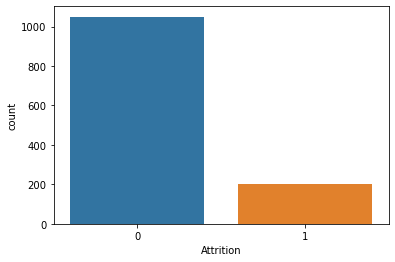

In [14]:
sns.countplot(data[t])
plt.show()

총 이직률은 0.16

### 2) feature1

In [79]:
f = 'MonthlyIncome'

월급 (달러)

In [80]:
data[f].describe()

count     1250.000000
mean      6525.548000
std       4676.979554
min       1009.000000
25%       2932.250000
50%       4988.000000
75%       8437.500000
max      19999.000000
Name: MonthlyIncome, dtype: float64

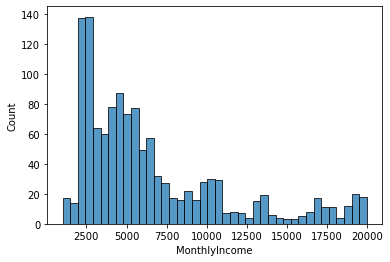

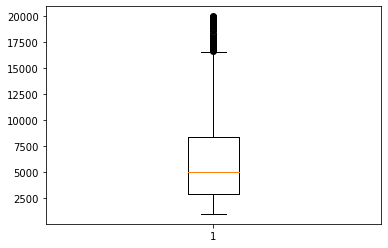

In [81]:
sns.histplot(data[f], bins = 40)
plt.show()
box = plt.boxplot(data[f])
plt.show()

In [85]:
print(data.loc[(data['MonthlyIncome']<=2932),'Attrition'].mean())
print(data.loc[(data['MonthlyIncome']>2932)&(data['MonthlyIncome']<=4988),'Attrition'].mean())
print(data.loc[(data['MonthlyIncome']>4988)&(data['MonthlyIncome']<=8437),'Attrition'].mean())
print(data.loc[(data['MonthlyIncome']>8437),'Attrition'].mean())

0.29073482428115016
0.14423076923076922
0.10576923076923077
0.09904153354632587


- 2000불 대의 저연봉자가 많다 10000불 이상부터는 약 3000불 간격으로 사람이 많아지는 것을 보아 연봉인상률을 추측가능
- 연봉이 상승함에 따라 이직률이 줄어드는 모습을 보인다

### 3) feature2

In [18]:
f = 'WorkLifeBalance'

워라밸 여부 (4범주로 분류)

In [19]:
data[f].value_counts()

3    747
2    297
4    137
1     69
Name: WorkLifeBalance, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


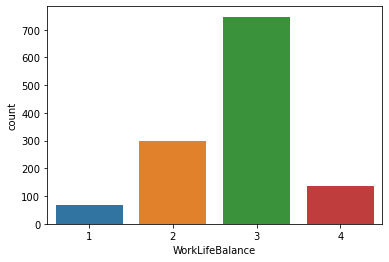

In [21]:
sns.countplot(data[f])
plt.show()

In [52]:
for i in range(1,5):
    print(data.loc[(data['WorkLifeBalance']==i)&(data['Gender']=='Male'),'Attrition'].mean())

0.3170731707317073
0.1912568306010929
0.15883668903803133
0.1348314606741573


In [53]:
for i in range(1,5):
    print(data.loc[(data['WorkLifeBalance']==i)&(data['Gender']=='Female'),'Attrition'].mean())

0.25
0.09649122807017543
0.12333333333333334
0.2916666666666667


일반적인 생각과 달리 워라밸이 최고라고 답한 사람들의 이직률이 2등을 기록하였다.
- 이를 남녀로 나누어 분석한 결과 남자의 경우 워라밸의 평가에 따라 이직률이 낮아지는 예상과 같이 양상을 보였다.
- 여자의 경우 워라밸을 최고라 평가한 경우가 이직률이 제일 높았는데 다른 심리적 요인이 추가된 것으로 판단됨.

### 4) feature3

In [27]:
f = 'MaritalStatus'

결혼상태 : 상태에 따라 안정적인 결정을 추구할 확률이 다를 것이다.
- 일반적인 예상 : 이직률은 결혼 < 이혼 < 싱글

In [28]:
data[f].value_counts()

Married     570
Single      404
Divorced    276
Name: MaritalStatus, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


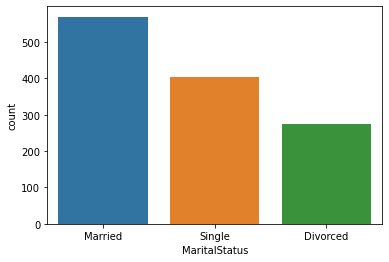

In [29]:
sns.countplot(data[f])
plt.show()

In [54]:
print(data.loc[data['MaritalStatus']=='Married','Attrition'].mean())
print(data.loc[data['MaritalStatus']=='Single','Attrition'].mean())
print(data.loc[data['MaritalStatus']=='Divorced','Attrition'].mean())

0.12105263157894737
0.26732673267326734
0.08333333333333333


In [58]:
print(data.loc[(data['MaritalStatus']=='Married')&(data['Gender']=='Female'),'Attrition'].mean())
print(data.loc[(data['MaritalStatus']=='Married')&(data['Gender']=='Male'),'Attrition'].mean())
print(data.loc[(data['MaritalStatus']=='Divorced')&(data['Gender']=='Female'),'Attrition'].mean())
print(data.loc[(data['MaritalStatus']=='Divorced')&(data['Gender']=='Male'),'Attrition'].mean())

0.11061946902654868
0.12790697674418605
0.05102040816326531
0.10112359550561797


이직률은 싱글이 제일 높고 결혼자가 이혼자보다 높았다
- 배우자가 있어 위험한 선택 가능? or 이혼시 심리적 안정 추구?
- 결혼, 이혼에 대한 남녀차이를 분석한 결과 결혼시는 남녀 차이가 없는 반면 이혼시 남자의 이직률이 2배 높았다
- 이혼후 여성은 정서적 안정 추구, 남성은 변화를 추구하는 것으로 생각됨

### 5) feature4

In [32]:
f = 'Age'

나이
- 나이가 작을수록 이직률이 높을 것이다 : 다양한 경험 가능, 시간적 여유..

In [33]:
data[f].describe()

count    1250.000000
mean       36.931200
std         9.122162
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

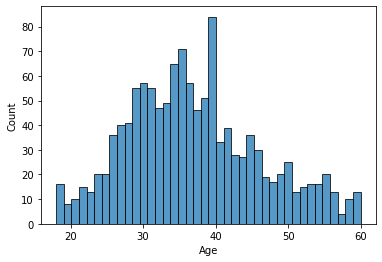

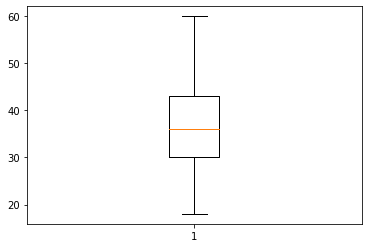

In [34]:
sns.histplot(data[f], bins = 40)
plt.show()
box = plt.boxplot(data[f])
plt.show()

In [41]:
print(data.loc[data['Age']<=25,'Attrition'].mean())
print(data.loc[(data['Age']>25)&(data['Age']<=30),'Attrition'].mean())
print(data.loc[(data['Age']>30)&(data['Age']<=35),'Attrition'].mean())
print(data.loc[(data['Age']>35)&(data['Age']<=40),'Attrition'].mean())
print(data.loc[(data['Age']>40)&(data['Age']<=50),'Attrition'].mean())
print(data.loc[(data['Age']>50)&(data['Age']<=60),'Attrition'].mean())

0.38235294117647056
0.2183406113537118
0.156794425087108
0.10084033613445378
0.09854014598540146
0.125


나이가 낮을수록 이직률이 줄어든다 + 50~60 사이에서 은퇴가 많은 회사

### 6) feature5

In [42]:
f= 'DistanceFromHome'

직장과의 거리 (마일) : 거리가 멀수록 이직률이 클것이다.

In [43]:
data[f].describe()

count    1196.000000
mean        9.258361
std         8.166016
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

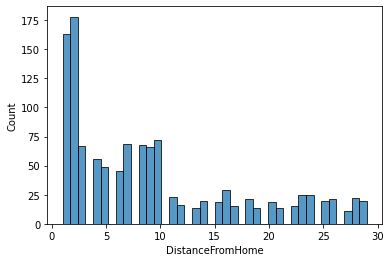

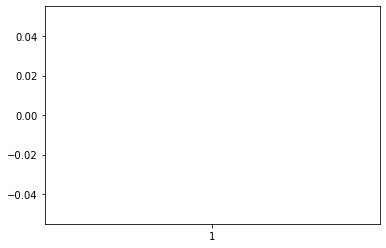

In [45]:
sns.histplot(data[f], bins = 40)
plt.show()
plt.boxplot(data[f])
plt.show()

In [47]:
print(data.loc[data['DistanceFromHome']<=10,'Attrition'].mean())
print(data.loc[(data['DistanceFromHome']>10)&(data['DistanceFromHome']<=20),'Attrition'].mean())
print(data.loc[(data['DistanceFromHome']>20)&(data['DistanceFromHome']<=30),'Attrition'].mean())

0.13925570228091236
0.20526315789473684
0.23121387283236994


예상대로 거리가 멀수록 퇴사확률이 증가한다.

### 7) feature6

In [65]:
f="TotalWorkingYears"

총 일한 경력수 (년) : 경력수가 짧을수록 이직률이 높아질 것이다.

In [66]:
data[f].describe()

count    1250.00000
mean       11.33920
std         7.79687
min         0.00000
25%         6.00000
50%        10.00000
75%        15.00000
max        40.00000
Name: TotalWorkingYears, dtype: float64

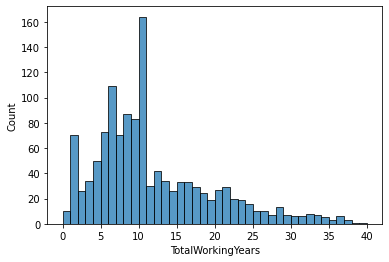

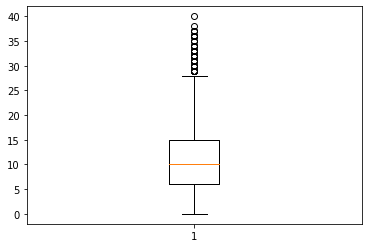

In [67]:
sns.histplot(data[f], bins = 40)
plt.show()
plt.boxplot(data[f])
plt.show()

In [69]:
print(data.loc[data["TotalWorkingYears"]<=6,'Attrition'].mean())
print(data.loc[(data["TotalWorkingYears"]>6)&(data["TotalWorkingYears"]<=10),'Attrition'].mean())
print(data.loc[(data["TotalWorkingYears"]>10)&(data["TotalWorkingYears"]<=15),'Attrition'].mean())
print(data.loc[(data["TotalWorkingYears"]>15),'Attrition'].mean())

0.2553763440860215
0.1485148514851485
0.11515151515151516
0.08414239482200647


예상대로 일한 년차가 높을 수록 이직률이 작았다.

### 8) 추가

In [59]:
f = 'PercentSalaryHike'

전년대비 연봉인상률 : 전체평균보다 낮을 경우 이직률이 높을 것이다.

In [60]:
data[f].describe()

count    1250.000000
mean       15.216000
std         3.625556
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

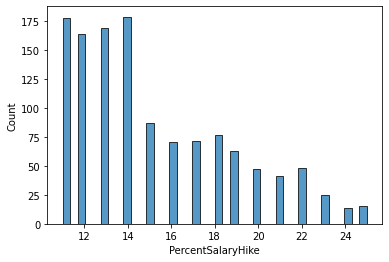

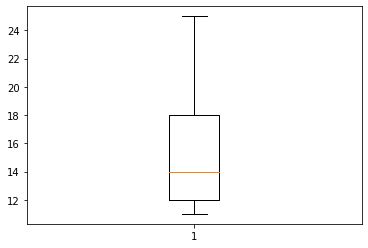

In [62]:
sns.histplot(data[f], bins = 40)
plt.show()
plt.boxplot(data[f])
plt.show()

- 4분위수를 이용해 상승률별 이직률 비교

In [64]:
print(data.loc[data['PercentSalaryHike']<=12,'Attrition'].mean())
print(data.loc[(data['PercentSalaryHike']>12)&(data['PercentSalaryHike']<=14),'Attrition'].mean())
print(data.loc[(data['PercentSalaryHike']>14)&(data['PercentSalaryHike']<=18),'Attrition'].mean())
print(data.loc[(data['PercentSalaryHike']>18),'Attrition'].mean())

0.1695906432748538
0.14367816091954022
0.16612377850162866
0.16205533596837945


예상과 달리 연봉상승률과 이직률은 큰 관계가 없었다.

### 9) 추가

In [70]:
f = 'RelationshipSatisfaction'

동료와의 관계 (범주) : 관계가 안좋을 수록 이직률이 높을 것이다.

In [71]:
data[f].value_counts()

3    397
4    365
2    258
1    230
Name: RelationshipSatisfaction, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


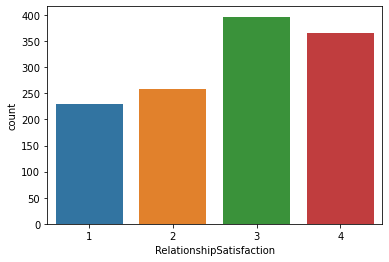

In [72]:
sns.countplot(data[f])
plt.show()

In [73]:
for i in range(1,5):
    print(data.loc[(data['RelationshipSatisfaction']==i),'Attrition'].mean())

0.20434782608695654
0.15891472868217055
0.15113350125944586
0.14246575342465753


In [74]:
for i in range(1,5):
    print(data.loc[(data['RelationshipSatisfaction']==i)&(data['Gender']=='Male'),'Attrition'].mean())

0.1865671641791045
0.18633540372670807
0.16666666666666666
0.16017316017316016


In [77]:
for i in range(1,5):
    print(data.loc[(data['RelationshipSatisfaction']==i)&(data['Gender']=='Female'),'Attrition'].mean())

0.22916666666666666
0.1134020618556701
0.12883435582822086
0.11194029850746269


- 직장인의 동료 관계 설문조사의 경우 Bad가 아니면 사실상 큰 차이를 못느끼는 경우라 추측된다.
- 남성의 경우 동료의 관계가 이직률에 주는 영향 정도가 여성에 비해 작다.

### 10) 추가 : 새로운 변수 평균 근무 년차

In [109]:
f = 'avgyear'

한 직장에서 평균 년차

In [111]:
data.NumCompaniesWorked.describe()

count    1229.000000
mean        2.678600
std         2.473647
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: NumCompaniesWorked, dtype: float64

In [113]:
data[f] = data['TotalWorkingYears']
for i in range(1,10):
    data.loc[data.NumCompaniesWorked==i,f] = data[f]/data['NumCompaniesWorked']
data.head()

,Attrition,Age,DistanceFromHome,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,avgyear
0,0,33,7.0,Male,3,Married,11691,0.0,No,11,4,14,4,14.0
1,0,35,18.0,Male,4,Single,9362,2.0,No,11,3,10,3,5.0
2,0,42,6.0,Male,1,Married,13348,9.0,No,13,2,18,4,2.0
3,0,46,2.0,Female,1,Married,17048,8.0,No,23,1,28,3,3.5
4,0,39,NaN,Male,4,Divorced,4127,2.0,No,18,4,7,3,3.5


In [114]:
data[f].describe()

count    1250.000000
mean        6.290248
std         5.832017
min         0.000000
25%         2.142857
50%         5.000000
75%         9.000000
max        40.000000
Name: avgyear, dtype: float64

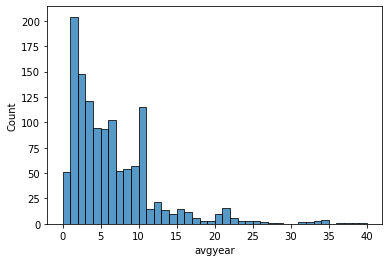

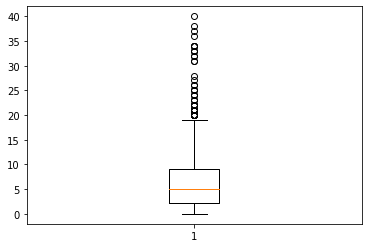

In [115]:
sns.histplot(data[f], bins = 40)
plt.show()
plt.boxplot(data[f])
plt.show()

In [117]:
print(data.loc[data[f]<=2.142,'Attrition'].mean())
print(data.loc[(data[f]>2.142)&(data[f]<=5),'Attrition'].mean())
print(data.loc[(data[f]>5)&(data[f]<=9),'Attrition'].mean())
print(data.loc[(data[f]>9),'Attrition'].mean())

0.33762057877813506
0.1111111111111111
0.10545454545454545
0.08391608391608392


한회사 평균 근무 년차가 짧을수록 이직률이 높다.

### 11) 추가 새로운 변수 전년 대비 상승 금액

In [121]:
f = 'hikem'

In [122]:
data[f] = data['MonthlyIncome']-(data['MonthlyIncome']/(1+(data['PercentSalaryHike']/100)))
data.head()

,Attrition,Age,DistanceFromHome,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,avgyear,hikem
0,0,33,7.0,Male,3,Married,11691,0.0,No,11,4,14,4,14.0,1158.567568
1,0,35,18.0,Male,4,Single,9362,2.0,No,11,3,10,3,5.0,927.765766
2,0,42,6.0,Male,1,Married,13348,9.0,No,13,2,18,4,2.0,1535.610619
3,0,46,2.0,Female,1,Married,17048,8.0,No,23,1,28,3,3.5,3187.837398
4,0,39,NaN,Male,4,Divorced,4127,2.0,No,18,4,7,3,3.5,629.542373


In [123]:
data[f].describe()

count    1250.000000
mean      852.725496
std       641.975905
min        99.990991
25%       394.022523
50%       640.295196
75%      1063.534990
max      3601.688525
Name: hikem, dtype: float64

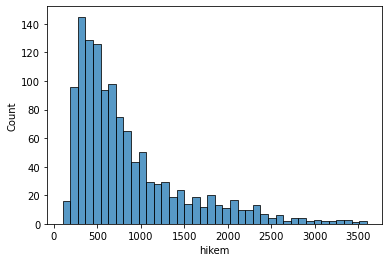

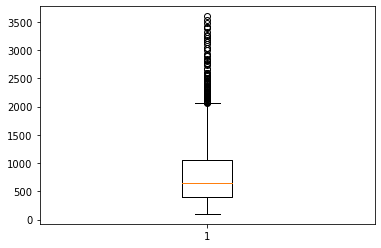

In [124]:
sns.histplot(data[f], bins = 40)
plt.show()
plt.boxplot(data[f])
plt.show()

In [126]:
print(data.loc[data[f]<=394,'Attrition'].mean())
print(data.loc[(data[f]>394)&(data[f]<=640),'Attrition'].mean())
print(data.loc[(data[f]>640)&(data[f]<=1063),'Attrition'].mean())
print(data.loc[(data[f]>1063),'Attrition'].mean())

0.25878594249201275
0.15384615384615385
0.14102564102564102
0.08626198083067092


상승률에 비해 객관적인 연봉 상승값에 따라 이직률이 달라지는 모습을 보인다

### JobSatisfaction

In [130]:
f = 'JobSatisfaction'

In [131]:
data[f].value_counts()

4    397
3    368
1    250
2    235
Name: JobSatisfaction, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


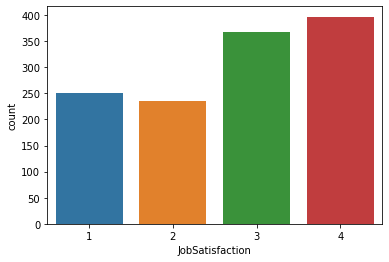

In [132]:
sns.countplot(data[f])
plt.show()

In [134]:
for i in range(1,5):
    print(data.loc[(data[f]==i),'Attrition'].mean())

0.212
0.16595744680851063
0.16304347826086957
0.12090680100755667


In [135]:
for i in range(1,5):
    print(data.loc[(data[f]==i)&(data['Gender']=='Male'),'Attrition'].mean())

0.25517241379310346
0.1366906474820144
0.1902654867256637
0.128


In [136]:
for i in range(1,5):
    print(data.loc[(data[f]==i)&(data['Gender']=='Female'),'Attrition'].mean())

0.1523809523809524
0.20833333333333334
0.11971830985915492
0.10884353741496598


## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

### (1) 범주형 Feature --> Target
* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 교차표(pd.crosstab())  
    ② 시각화( Stacked Bar, Mosaic)  
    ③ 가설검정(카이제곱검정)
* 각 feature 별로 관계의 정도를 3가지로 정리해봅시다. 

### 가설 1번 : 남성은 워라밸, 여성은 동료관계가 더 영향을 미칠 것이다.

#### 1) WorkLifeBalence --> target

In [91]:
f = 'WorkLifeBalance'
t = 'Attrition'

In [153]:
male = data.loc[data.Gender=='Male',:]
female = data.loc[data.Gender=='Female',:]

In [93]:
mtmp = pd.crosstab(male[f], male[t], normalize='index')
ftmp = pd.crosstab(female[f], female[t], normalize='index')

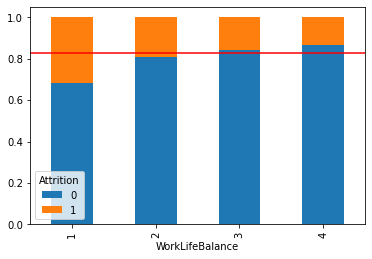

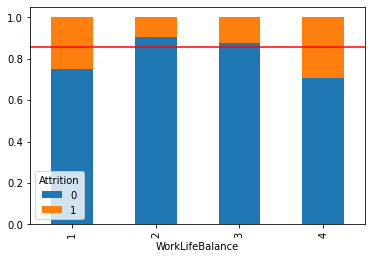

In [94]:
mtmp.plot.bar(stacked=True)
plt.axhline(1-male[t].mean(), color = 'r')
plt.show()
ftmp.plot.bar(stacked=True)
plt.axhline(1-female[t].mean(), color = 'r')
plt.show()

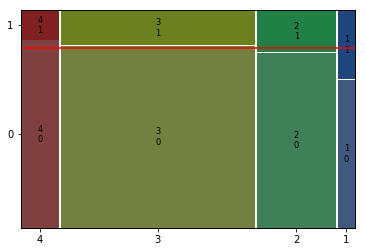

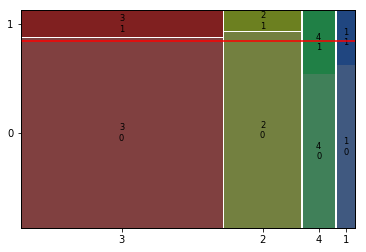

In [95]:
mosaic(male,[f,t])
plt.axhline(1-male[t].mean(), color = 'r')
plt.show()
mosaic(female,[f,t])
plt.axhline(1-female[t].mean(), color = 'r')
plt.show()

In [103]:
mtmp = pd.crosstab(male[f], male[t])
print('남성교차표\n', mtmp)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(mtmp)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])
print('-' * 100)
ftmp = pd.crosstab(female[f], female[t])
print('여성교차표\n', ftmp)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(ftmp)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])
print('-' * 100)
tmp = pd.crosstab(data[f], data[t])
print('교차표\n', tmp)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(tmp)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

남성교차표
 Attrition          0   1
WorkLifeBalance         
1                 28  13
2                148  35
3                376  71
4                 77  12
----------------------------------------------------------------------------------------------------
카이제곱통계량 7.928494457708301
p-value 0.047512858080335695
기대빈도
 [[ 33.93289474   7.06710526]
 [151.45657895  31.54342105]
 [369.95131579  77.04868421]
 [ 73.65921053  15.34078947]]
----------------------------------------------------------------------------------------------------
여성교차표
 Attrition          0   1
WorkLifeBalance         
1                 21   7
2                103  11
3                263  37
4                 34  14
----------------------------------------------------------------------------------------------------
카이제곱통계량 14.396111712031635
p-value 0.002412682910648171
기대빈도
 [[ 24.05714286   3.94285714]
 [ 97.94693878  16.05306122]
 [257.75510204  42.24489796]
 [ 41.24081633   6.75918367]]
--------------------------

#### 결론
- 워라밸 통계는 어느정도 약한 상관관계를 가짐.
- 남성의 경우 설문조사를 자신의 진짜 생각대로 하는 경향을 보임. 설문조사의 정확도는 높으나 크게 영향을 준다고 하긴 어렵다.
- 여성의 경우 설문조사 자체의 정확도는 떨어지나 워라밸의 이직률 영향도는 남성보다 높았다.
- 여성의 워라밸 최고라는 설문은 사실이 아닐 가능성이 있다고 추측가능하다.

#### 2)  RelationshipSatisfaction --> target

In [104]:
f = 'RelationshipSatisfaction'

In [105]:
mtmp = pd.crosstab(male[f], male[t], normalize='index')
ftmp = pd.crosstab(female[f], female[t], normalize='index')

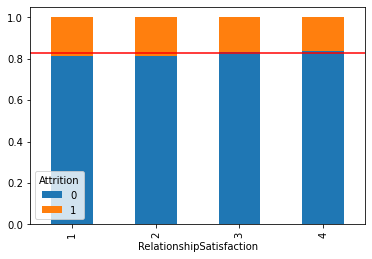

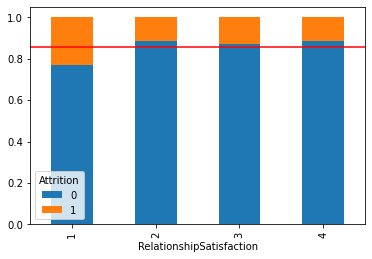

In [106]:
mtmp.plot.bar(stacked=True)
plt.axhline(1-male[t].mean(), color = 'r')
plt.show()
ftmp.plot.bar(stacked=True)
plt.axhline(1-female[t].mean(), color = 'r')
plt.show()

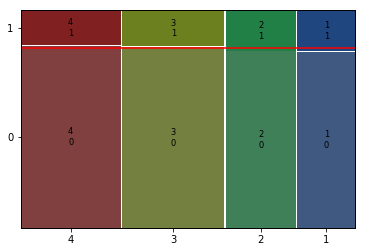

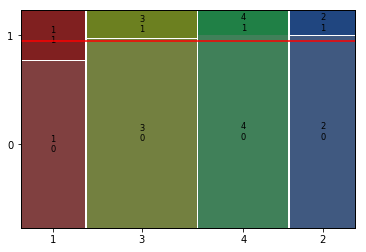

In [107]:
mosaic(male,[f,t])
plt.axhline(1-male[t].mean(), color = 'r')
plt.show()
mosaic(female,[f,t])
plt.axhline(1-female[t].mean(), color = 'r')
plt.show()

In [108]:
mtmp = pd.crosstab(male[f], male[t])
print('남성교차표\n', mtmp)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(mtmp)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])
print('-' * 100)
ftmp = pd.crosstab(female[f], female[t])
print('여성교차표\n', ftmp)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(ftmp)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])
print('-' * 100)
tmp = pd.crosstab(data[f], data[t])
print('교차표\n', tmp)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(tmp)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

남성교차표
 Attrition                   0   1
RelationshipSatisfaction         
1                         109  25
2                         131  30
3                         195  39
4                         194  37
----------------------------------------------------------------------------------------------------
카이제곱통계량 0.703678044822228
p-value 0.872338496648803
기대빈도
 [[110.90263158  23.09736842]
 [133.24868421  27.75131579]
 [193.66578947  40.33421053]
 [191.18289474  39.81710526]]
----------------------------------------------------------------------------------------------------
여성교차표
 Attrition                   0   1
RelationshipSatisfaction         
1                          74  22
2                          86  11
3                         142  21
4                         119  15
----------------------------------------------------------------------------------------------------
카이제곱통계량 7.913148226437269
p-value 0.0478411900654088
기대빈도
 [[ 82.48163265  13.51836735]
 [ 83.340816

#### 결론
- 동료와의 관계의 경우 전체 데이터로 분석하면 상관관계가 없는 데이터로 나옴
- 이를 남성과 여성으로 분리할 경우 남성은 동료와의 관계가 이직률에 영향을 거의 주지 않는 반면 여성은 동료와의 관계가 이직률에 영향을 미친다.

#### 3) feature --> target

In [144]:
f = 'MaritalStatus'

In [145]:
mtmp = pd.crosstab(male[f], male[t], normalize='index')
ftmp = pd.crosstab(female[f], female[t], normalize='index')

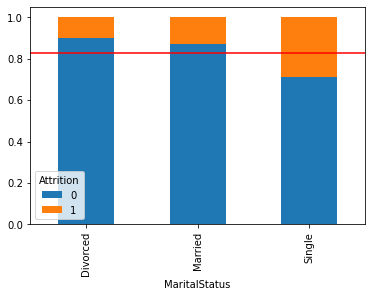

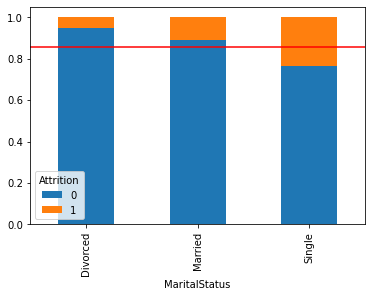

In [146]:
mtmp.plot.bar(stacked=True)
plt.axhline(1-male[t].mean(), color = 'r')
plt.show()
ftmp.plot.bar(stacked=True)
plt.axhline(1-female[t].mean(), color = 'r')
plt.show()

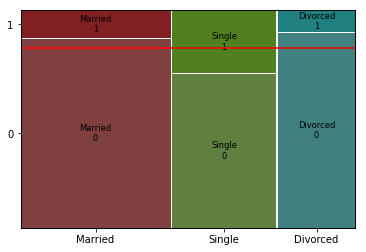

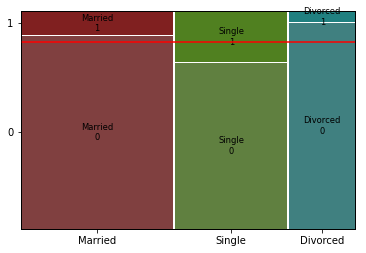

In [147]:
mosaic(male,[f,t])
plt.axhline(1-male[t].mean(), color = 'r')
plt.show()
mosaic(female,[f,t])
plt.axhline(1-female[t].mean(), color = 'r')
plt.show()

In [148]:
mtmp = pd.crosstab(male[f], male[t])
print('남성교차표\n', mtmp)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(mtmp)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])
print('-' * 100)
ftmp = pd.crosstab(female[f], female[t])
print('여성교차표\n', ftmp)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(ftmp)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])
print('-' * 100)
tmp = pd.crosstab(data[f], data[t])
print('교차표\n', tmp)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(tmp)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

남성교차표
 Attrition        0   1
MaritalStatus         
Divorced       160  18
Married        300  44
Single         169  69
----------------------------------------------------------------------------------------------------
카이제곱통계량 34.15220765150734
p-value 3.836563017190429e-08
기대빈도
 [[147.31842105  30.68157895]
 [284.70526316  59.29473684]
 [196.97631579  41.02368421]]
----------------------------------------------------------------------------------------------------
여성교차표
 Attrition        0   1
MaritalStatus         
Divorced        93   5
Married        201  25
Single         127  39
----------------------------------------------------------------------------------------------------
카이제곱통계량 20.389885106902568
p-value 3.735878175331462e-05
기대빈도
 [[ 84.2        13.8      ]
 [194.1755102  31.8244898]
 [142.6244898  23.3755102]]
----------------------------------------------------------------------------------------------------
교차표
 Attrition        0    1
MaritalStatus          
Divo

#### 4) 추가 feature --> target

age 변수를 나이대로 바꾸어 범주형으로 조사

In [150]:
data['Ages'] = data['Age']//10*10
data.head()

,Attrition,Age,DistanceFromHome,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,avgyear,hikem,Ages
0,0,33,7.0,Male,3,Married,11691,0.0,No,11,4,14,4,14.0,1158.567568,30
1,0,35,18.0,Male,4,Single,9362,2.0,No,11,3,10,3,5.0,927.765766,30
2,0,42,6.0,Male,1,Married,13348,9.0,No,13,2,18,4,2.0,1535.610619,40
3,0,46,2.0,Female,1,Married,17048,8.0,No,23,1,28,3,3.5,3187.837398,40
4,0,39,NaN,Male,4,Divorced,4127,2.0,No,18,4,7,3,3.5,629.542373,30


In [151]:
f = 'Ages'

In [154]:
mtmp = pd.crosstab(male[f], male[t], normalize='index')
ftmp = pd.crosstab(female[f], female[t], normalize='index')

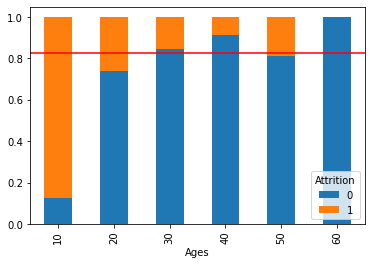

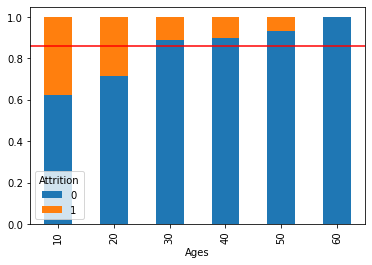

In [155]:
mtmp.plot.bar(stacked=True)
plt.axhline(1-male[t].mean(), color = 'r')
plt.show()
ftmp.plot.bar(stacked=True)
plt.axhline(1-female[t].mean(), color = 'r')
plt.show()

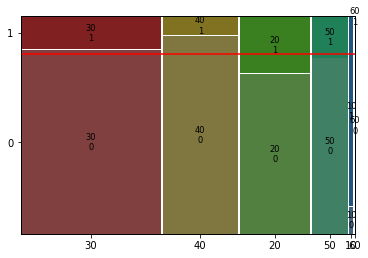

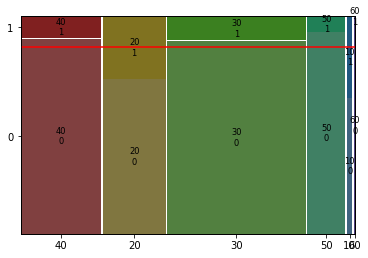

In [156]:
mosaic(male,[f,t])
plt.axhline(1-male[t].mean(), color = 'r')
plt.show()
mosaic(female,[f,t])
plt.axhline(1-female[t].mean(), color = 'r')
plt.show()

In [157]:
mtmp = pd.crosstab(male[f], male[t])
print('남성교차표\n', mtmp)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(mtmp)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])
print('-' * 100)
ftmp = pd.crosstab(female[f], female[t])
print('여성교차표\n', ftmp)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(ftmp)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])
print('-' * 100)
tmp = pd.crosstab(data[f], data[t])
print('교차표\n', tmp)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(tmp)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

남성교차표
 Attrition    0   1
Ages              
10           1   7
20         121  43
30         277  50
40         160  15
50          68  16
60           2   0
----------------------------------------------------------------------------------------------------
카이제곱통계량 47.65061807648352
p-value 4.185683645154983e-09
기대빈도
 [[  6.62105263   1.37894737]
 [135.73157895  28.26842105]
 [270.63552632  56.36447368]
 [144.83552632  30.16447368]
 [ 69.52105263  14.47894737]
 [  1.65526316   0.34473684]]
----------------------------------------------------------------------------------------------------
여성교차표
 Attrition    0   1
Ages              
10           5   3
20          67  27
30         185  23
40         109  12
50          53   4
60           2   0
----------------------------------------------------------------------------------------------------
카이제곱통계량 26.26764791113441
p-value 7.917778015833925e-05
기대빈도
 [[  6.87346939   1.12653061]
 [ 80.76326531  13.23673469]
 [178.71020408  29.289

#### 5) 추가 feature --> target

### (2) 숫자형 Feature --> target

* 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 그래프 : histogram, densityplot   
    ② 수치화 : 로지스틱회귀

### 가설 2번 : 평균 근무 년차가 낮을수록 이직률이 높을 것이다.

#### 1) avgyear --> target

In [118]:
f = 'avgyear'

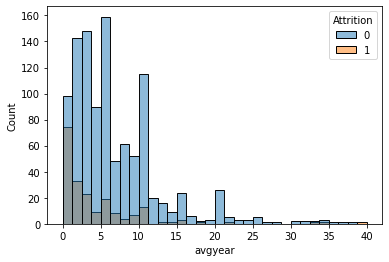

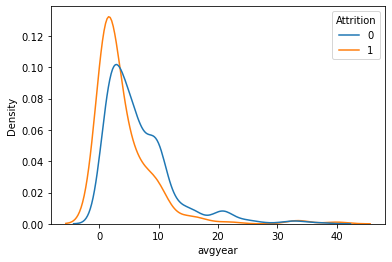

In [119]:
sns.histplot(x=f, data = data, hue = t)
plt.show()
sns.kdeplot(x=f, data = data, hue = t,common_norm=0)
plt.show()

In [120]:
model = sm.Logit(data[t], data[f])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.453219
         Iterations 7
avgyear    4.716105e-64
dtype: float64


### 가설 3번 : 전년 대비 상승금액이 클수록 이직률이 낮을 것이다.

#### 2) hikem --> target

In [127]:
f = 'hikem'

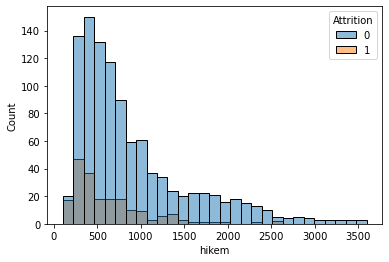

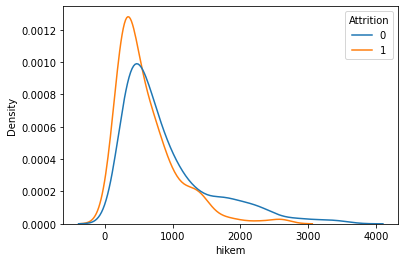

In [128]:
sns.histplot(x=f, data = data, hue = t)
plt.show()
sns.kdeplot(x=f, data = data, hue = t,common_norm=0)
plt.show()

In [129]:
model = sm.Logit(data[t], data[f])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.439354
         Iterations 6
hikem    1.516825e-70
dtype: float64


#### 3) feature --> target

In [140]:
f = 'PercentSalaryHike'

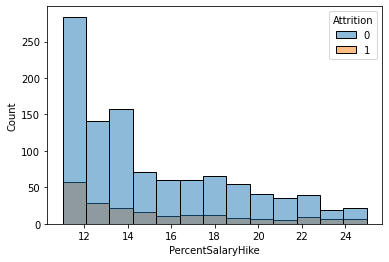

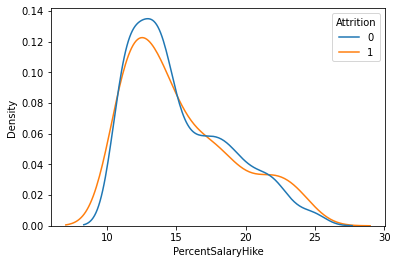

In [141]:
sns.histplot(x=f, data = data, hue = t)
plt.show()
sns.kdeplot(x=f, data = data, hue = t,common_norm=0)
plt.show()

In [143]:
model = sm.Logit(data[t], data[f])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.450230
         Iterations 5
PercentSalaryHike    3.979995e-95
dtype: float64


### 결론
- 단순 상승 금액보다 상승률이 이직결정에 더 큰 영향을 끼친다.

#### 4) 추가 feature --> target

distance nan값 -> 최빈값으로 채우기
- 회사근처에 비슷한 곳에 살 확률이 높다고 생각함

In [173]:
f = 'disnum'
tmp = data.copy()
tmp.dropna(axis=0,inplace=True)
tmp[f] = tmp['DistanceFromHome'].astype('int')
tmp[f].value_counts()

2     176
1     159
7      69
10     69
8      68
3      67
9      64
4      55
5      48
6      44
16     29
23     25
11     23
24     23
28     21
26     21
18     21
20     19
25     19
15     19
14     19
29     19
22     15
17     15
12     15
21     14
19     14
13     14
27     11
Name: disnum, dtype: int64

In [183]:
data.fillna({'DistanceFromHome':2})
data.isna().sum()

Attrition                    0
Age                          0
DistanceFromHome            54
Gender                       0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
NumCompaniesWorked          21
OverTime                     0
PercentSalaryHike            0
RelationshipSatisfaction     0
TotalWorkingYears            0
WorkLifeBalance              0
avgyear                      0
hikem                        0
Ages                         0
dtype: int64

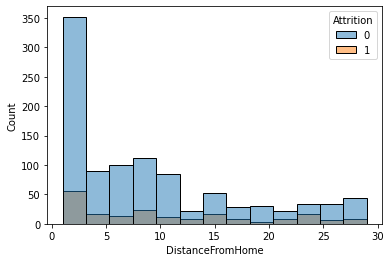

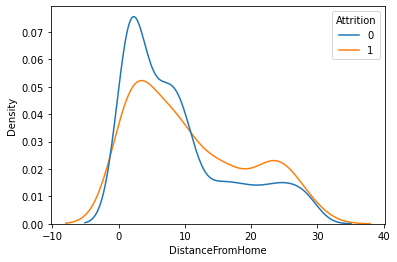

In [176]:
f = 'DistanceFromHome'
sns.histplot(x=f, data = data, hue = t)
plt.show()
sns.kdeplot(x=f, data = data, hue = t,common_norm=0)
plt.show()

In [184]:
data.dropna(axis=0,inplace=True)
model = sm.Logit(data[t], data[f])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.570401
         Iterations 6
DistanceFromHome    3.022649e-43
dtype: float64


#### 5) 추가 feature --> target

## 4.관계 정리

### 1) 강한관계의 변수

- avgyear : 평균근무 년차
- hikem : 전년 대비 상승 금액
- MaritalStatus : 결혼 여부
- Ages : 나이대
- DistanceFromHome

### 2) 약한관계의 변수

- 여성의 동료와의 관계
- 워라밸

### 3) 관계 없음

- 남성의 동료와의 관계

## 5.결론

### 가설 1
- 동료와의 관계, 워라밸 모두 남성보다 여성에게 더 큰 영향을 끼친다. 
- 워라밸 설문조사의 경우 남성은 사실대로 답한 반면 여성의 설문은 사실을 반영하지 않았을 가능성이 있다.

### 가설 2
- 평균 근무 년차가 낮을수록 이직률이 높아진다.
- 이직 받을 시 그 사람의 평균 근무 년차를 파악해야 한다.

### 가설 3
- 단순 금액 상승보다 전년 대비 상승률이 이직 결정에 더 큰 영향을 끼친다.

### 가설 4
- 직원의 결혼 여부는 이직률에 큰 영향을 끼친다.
- 평균적으로 남성에게 결혼여부가 더 큰 영향을 미쳤지만 큰 차이는 아니었다.

### 가설 5
- 나이대가 젊을 수록 이직률이 높아지는 경향을 보인다.
- 특히 남자 20대는 80%가 넘는 이직률을 보여주고 있다.
- 남성 50대가 갑자기 이직률이 높아지는 것을 보아 대부분의 정년이 50대임을 알 수 있다.